In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv('Data_Train.csv')
data

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030
...,...,...,...,...,...,...,...,...,...,...,...
78453,1144131,Resident Advisor,ambient,AU,RA.505 Josey Rebelle,2016-02-08 09:11:33.000000,12221,19,489,47,143726
78454,1415261,Trap Sounds,trap,AU,Drama We Cause - Lurtz [Exclusive],2016-03-02 01:24:39.000000,8265,4,292,100,211419
78455,705157,Mixmag,electronic,AU,Premiere: ELLLL 'SKITTLES',2019-02-11 13:15:05.000000,3621,1,157,31,1403057
78456,175337,DHA AM (Deep House London),electronic,AU,Night Vision - DHL Mix #124,2017-01-18 10:10:12.000000,8896,24,371,89,143743


In [0]:
data['ReleasingYear'] = pd.DatetimeIndex(data['Timestamp']).year

In [0]:
data

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers,ReleasingYear
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563,2018
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141,2016
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248,2015
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655,2017
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
78453,1144131,Resident Advisor,ambient,AU,RA.505 Josey Rebelle,2016-02-08 09:11:33.000000,12221,19,489,47,143726,2016
78454,1415261,Trap Sounds,trap,AU,Drama We Cause - Lurtz [Exclusive],2016-03-02 01:24:39.000000,8265,4,292,100,211419,2016
78455,705157,Mixmag,electronic,AU,Premiere: ELLLL 'SKITTLES',2019-02-11 13:15:05.000000,3621,1,157,31,1403057,2019
78456,175337,DHA AM (Deep House London),electronic,AU,Night Vision - DHL Mix #124,2017-01-18 10:10:12.000000,8896,24,371,89,143743,2017


In [0]:
data.groupby('Genre')['Unique_ID'].count()

Genre
all-music               10277
alternativerock           156
ambient                   847
classical                 767
country                   336
danceedm                22633
deephouse                2423
disco                     374
drumbass                  671
dubstep                  1100
electronic              18331
folksingersongwriter       39
hiphoprap                 100
indie                      11
latin                    4562
metal                     523
pop                      1787
rbsoul                   5411
reggaeton                  55
rock                     4000
trap                     4055
Name: Unique_ID, dtype: int64

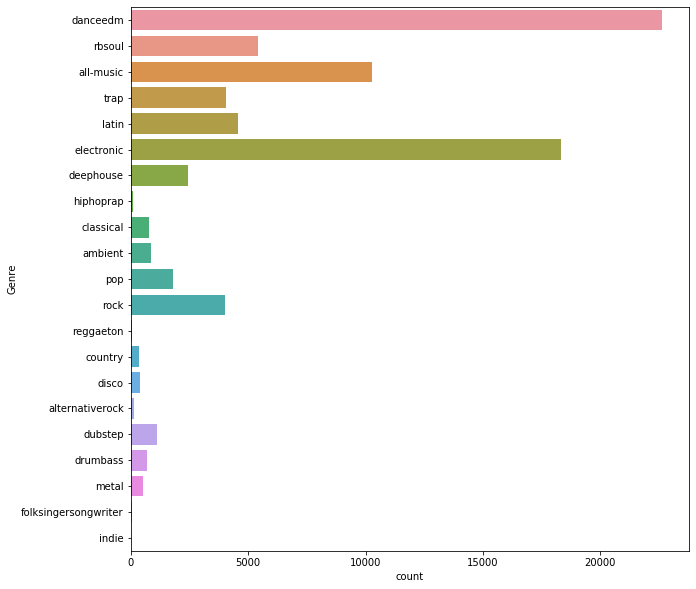

In [0]:
plt.figure(figsize=(10,10))
sns.countplot(y='Genre',data=data)

In [0]:
ls = data.groupby('ReleasingYear')['Unique_ID'].count()

ReleasingYear
1973        5
1979        7
1986        3
1990        1
1991      154
1992       32
1994       26
1995        8
1996       19
1997        5
1999       30
2000       13
2001       25
2002       60
2003       76
2004      152
2005      127
2006       22
2007      140
2008      157
2009      488
2010      583
2011     1456
2012     2791
2013     3970
2014     6636
2015     9446
2016    12166
2017    14344
2018    20944
2019     4572
Name: Unique_ID, dtype: int64

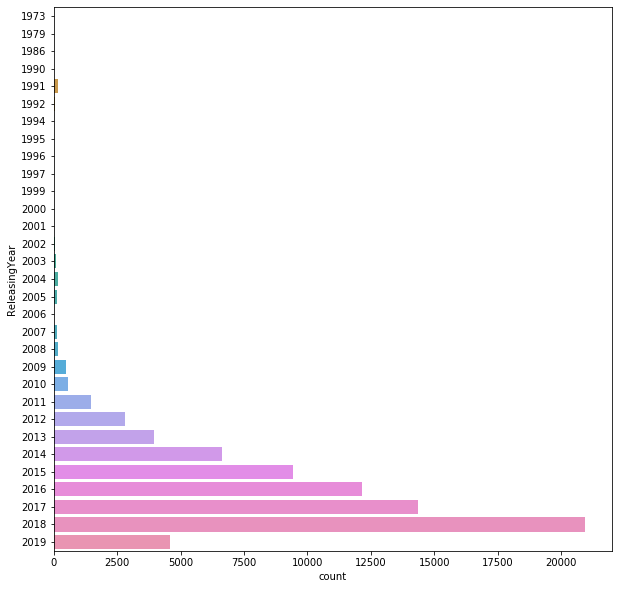

In [0]:
plt.figure(figsize=(10,10))
sns.countplot(y='ReleasingYear',data=data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


In [0]:
print("Unique Singers:"+str(data['Name'].nunique()))
print("Unique Generes:"+str(data['Genre'].nunique()))
print("Unique Countries:"+str(data['Country'].nunique()))

Unique Singers:1209
Unique Generes:21
Unique Countries:1


In [0]:
data.fillna('We Rise',inplace=True)

In [0]:
data.isnull().any()

Unique_ID     False
Name          False
Genre         False
Country       False
Song_Name     False
Timestamp     False
Views         False
Comments      False
Likes         False
Popularity    False
Followers     False
dtype: bool

In [0]:
le = LabelEncoder()

In [0]:
def ChangeCatToNum(data):
  cat_features = ['Name','Genre']
  data.reset_index(drop=True)
  data[cat_features] = data[cat_features].apply(le.fit_transform)
  currDate = datetime.datetime.now()
  datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
  data = data.assign(DaysAfterRelease=np.nan)
  for i in range(len(data)):
    diff= (datetime.datetime.strptime(str(currDate),datetimeFormat)-datetime.datetime.strptime(str(data.iloc[i,5]),datetimeFormat))
    data.iloc[i,11] = int(diff.days)
  data["Popularity"] = data["Popularity"].str.replace(",","")
  data['Popularity']=data['Popularity'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
  data["Likes"] = data["Likes"].str.replace(",","")
  data['Likes']=data['Likes'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
  data.drop(['Country','Song_Name','Timestamp'],axis=1,inplace=True)
  return data

In [0]:
Converted_training_data = ChangeCatToNum(data)

In [0]:
Converted_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 9 columns):
Unique_ID           78458 non-null int64
Name                78458 non-null int64
Genre               78458 non-null int64
Views               78458 non-null int64
Comments            78458 non-null int64
Likes               78458 non-null int64
Popularity          78458 non-null int64
Followers           78458 non-null int64
DaysAfterRelease    78458 non-null float64
dtypes: float64(1), int64(8)
memory usage: 5.4 MB


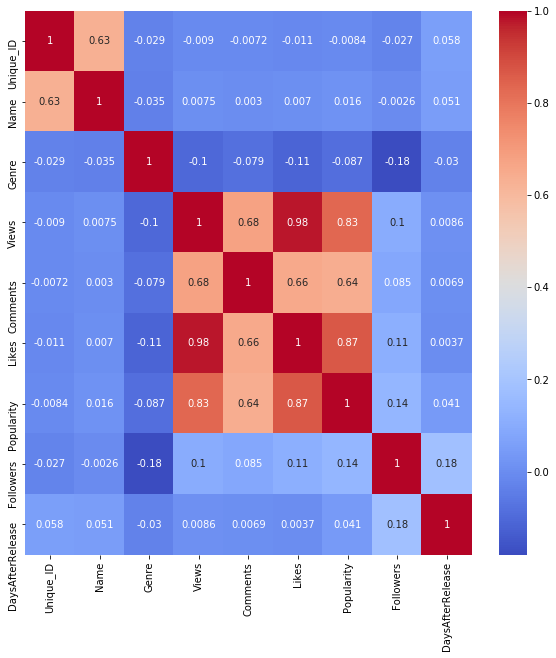

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(Converted_training_data.corr(),annot=True,cmap='coolwarm',fmt='.2g')

In [0]:
Converted_training_data

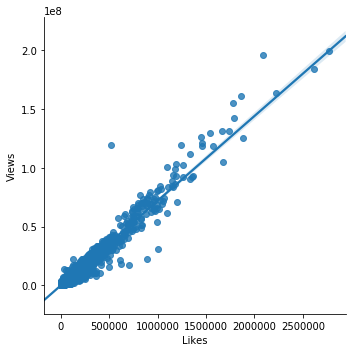

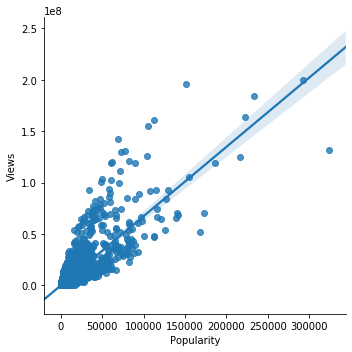

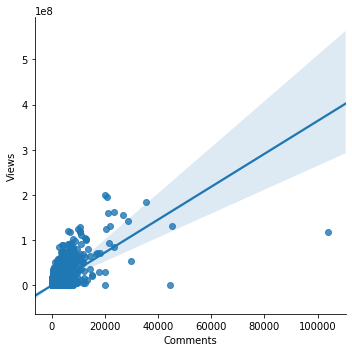

In [0]:
sns.lmplot(x='Likes',y='Views',data=Converted_training_data)
sns.lmplot(x='Popularity',y='Views',data=Converted_training_data)
sns.lmplot(x='Comments',y='Views',data=Converted_training_data)

In [0]:
Train_views = Converted_training_data['Views']
Converted_training_data.drop(['Views'],inplace=True,axis=1)

In [0]:
Converted_training_data.drop(['Unique_ID'],inplace=True,axis=1)

In [0]:
X_train,X_val,y_train,y_val = train_test_split(Converted_training_data,Train_views,test_size=0.2,random_state=42)

In [0]:
imp_features = ['Likes','Popularity','Comments']
final_train_set = X_train[list(imp_features)]

In [0]:
def rmse(model):
  rmse = np.sqrt(-cross_val_score(model,final_train_set,y_train,scoring="neg_mean_squared_error",cv=3))
  return(rmse)

In [0]:
ensemble_models = [AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),DecisionTreeRegressor()]
model_names = ["AdaBoost Regressor","Gradient Boosting Regressor","Bagging Regressor","Decision Tree Regressor"]
estimators = [150,200,400,700,800]
for name,model in zip(model_names,ensemble_models):
  model.fit(final_train_set,y_train)
  pred_views = model.predict(X_val[list(imp_features)])
  print("R^2 Score for",name,"is : ",r2_score(y_val,pred_views))

R^2 Score for AdaBoost Regressor is :  0.9404373579833728
R^2 Score for Gradient Boosting Regressor is :  0.9747431099140568
R^2 Score for Bagging Regressor is :  0.9726554114047895
R^2 Score for Decision Tree Regressor is :  0.9565301614964002


In [0]:
dt = DecisionTreeRegressor()
dt.fit(final_train_set,y_train)
pred = dt.predict(X_val[list(imp_features)])
pred[:15]

array([ 14652.        ,  27042.        ,   3532.        ,   5554.25      ,
       199765.        ,   4714.        ,  31863.        ,  22506.        ,
         2390.        , 120838.        ,   2348.38461538, 359020.        ,
        38100.        ,   7949.        ,   1937.8       ])

In [0]:
br = BaggingRegressor()
br.fit(final_train_set,y_train)
pred = br.predict(X_val[list(imp_features)])
pred[:15]

array([ 14249.55      ,  24355.2       ,   5976.5       ,   5580.5547619 ,
       259466.4       ,   4575.9       ,  13305.5       ,  17730.3       ,
         5580.3       , 101586.1       ,   2371.96911589, 236994.8       ,
        45433.5       ,   7696.8       ,   1774.86166667])

In [0]:
gb = GradientBoostingRegressor()
gb.fit(final_train_set,y_train)
pred = gb.predict(X_val[list(imp_features)])
pred[:15]

array([ 22783.35151152,  40354.78182939,  21989.33561236,  18835.5497149 ,
       166523.52606583,  21989.33561236,  18835.5497149 ,  24316.88296142,
        20072.11258716, 104848.50410411,  18835.5497149 , 290311.83699627,
        89194.81696282,  20979.64786938,  18835.5497149 ])

Text(0, 0.5, 'rmse')

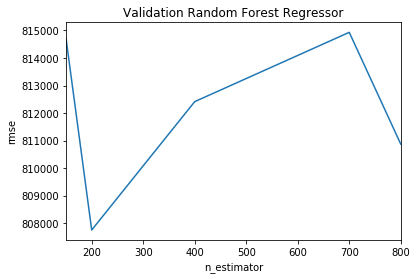

In [0]:
cv_score = [rmse(RandomForestRegressor(n_estimators = estimator)).mean() for estimator in estimators]
cv_gb = pd.Series(cv_score , index = estimators)
cv_gb.plot(title = "Validation Random Forest Regressor")
plt.xlabel("n_estimator")
plt.ylabel("rmse")

In [0]:
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(final_train_set,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
predictions = rf_model.predict(X_val[list(imp_features)])


In [0]:
print("Score on validation set using RandomForest : ",r2_score(y_val,predictions))

Score on validation set using RandomForest :  0.9731100727910601


In [0]:
predictions[:15]

array([ 13775.11575   ,  26702.66      ,   5291.92      ,   5676.83451227,
       261672.44      ,  15214.005     ,  16274.4675    ,  19528.81041667,
         5005.12547619, 110424.365     ,   2403.59490874, 256671.71      ,
        64132.66      ,   7641.4675119 ,   1890.77592262])

In [0]:
Test_data = pd.read_csv('Data_Test.csv')
Test_data.isnull().any()

Unique_ID     False
Name          False
Genre         False
Country       False
Song_Name     False
Timestamp     False
Comments      False
Likes         False
Popularity    False
Followers     False
dtype: bool

In [0]:
Test_data

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
0,562546,L2Share♫79,all-music,AU,엔플라잉 N.Flying - Rooftop (옥탑방),2019-01-02 09:49:19.000000,26,"5,428",118,2568
1,907584,Morgan Page,danceedm,AU,Morgan Page - In The Air - Episode 246,2015-03-09 17:30:10.000000,18,738,195,155645
2,213013,Dirty Workz,danceedm,AU,Outlander - Devotion (Official HQ Preview),2013-09-18 16:09:03.000000,18,386,96,29446
3,340312,Gucci Mane,all-music,AU,Freaky Gurl,2007-08-14 00:00:00.000000,1,388,19,799410
4,41854,Angga Kecap,rock,AU,Radical Nusantara - Teman,2018-08-10 16:28:54.000000,0,79,1,2
...,...,...,...,...,...,...,...,...,...,...
19610,183403,Deep Sounds,danceedm,AU,Jordan Burns - Your Mind,2017-08-29 20:39:57.000000,17,"1,775",341,357007
19611,1272578,Sjammienators,danceedm,AU,Sjammienators & System Overload & MC Komplex -...,2016-01-22 13:51:52.000000,12,"2,095",305,17356
19612,539454,Kompakt,electronic,AU,Vermont - Paradigma (Wassermann Krautramatrik ...,2017-10-27 04:51:20.000000,5,39,12,165268
19613,1543013,Yheti,electronic,AU,Yheti & Metapod - Ominous Combo,2017-08-30 16:35:20.000000,113,"3,754",666,52573


In [0]:
def ChangeCatToNumTest(data):
  cat_features = ['Name','Genre']
  data.reset_index(drop=True)
  data[cat_features] = data[cat_features].apply(le.fit_transform)
  currDate = datetime.datetime.now()
  datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
  data = data.assign(DaysAfterRelease=np.nan)
  for i in range(len(data)):
    diff= (datetime.datetime.strptime(str(currDate),datetimeFormat)-datetime.datetime.strptime(str(data.iloc[i,5]),datetimeFormat))
    data.iloc[i,10] = int(diff.days)
  data["Popularity"] = data["Popularity"].str.replace(",","")
  data['Popularity']=data['Popularity'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
  data["Likes"] = data["Likes"].str.replace(",","")
  data['Likes']=data['Likes'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
  data.drop(['Country','Song_Name','Timestamp'],axis=1,inplace=True)
  return data

In [0]:
Converted_test_set = ChangeCatToNumTest(Test_data)

In [0]:
Converted_test_set

,Unique_ID,Name,Genre,Comments,Likes,Popularity,Followers,DaysAfterRelease
0,562546,487,0,26,5428,118,2568,391.0
1,907584,604,5,18,738,195,155645,1786.0
2,213013,235,5,18,386,96,29446,2323.0
3,340312,350,0,1,388,19,799410,4550.0
4,41854,53,19,0,79,1,2,536.0
...,...,...,...,...,...,...,...,...
19610,183403,225,5,17,1775,341,357007,881.0
19611,1272578,794,5,12,2095,305,17356,1467.0
19612,539454,467,10,5,39,12,165268,823.0
19613,1543013,966,10,113,3754,666,52573,881.0


In [0]:
final_test_set = Converted_test_set[list(imp_features)]
final_test_set

,Likes,Popularity,Comments
0,5428,118,26
1,738,195,18
2,386,96,18
3,388,19,1
4,79,1,0
...,...,...,...
19610,1775,341,17
19611,2095,305,12
19612,39,12,5
19613,3754,666,113


In [0]:
pred_test = gb.predict(final_test_set)
pred_test[:15]

array([261328.22988081,  35500.64528815,  25363.63512268,  26417.32834926,
        20072.11258716,  24316.88296142,  18835.5497149 ,  24316.88296142,
        18835.5497149 ,  40354.78182939,  20072.11258716,  44999.86696085,
        18835.5497149 ,  20072.11258716,  24316.88296142])

In [0]:
my_submission = pd.DataFrame({"Unique_ID":Converted_test_set.Unique_ID,"Views":pred_test})
my_submission.to_excel("my_submission.xlsx",index=False)